# New York City Collisions Analysis

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [108]:
#Loading dataset:

collisions = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20250218.csv')

collisions.head()

C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_17016\1680808368.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20250218.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


## Data Exploration:

In [109]:
collisions.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [110]:
collisions_subsets = collisions[['CRASH DATE', 'CRASH TIME', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

collisions_subsets

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,OCEAN PARKWAY,1.0,0.0,0,0,0,0,1,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,BROOKLYN BRIDGE,0.0,0.0,0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156352,02/14/2025,10:05,E TREMONT AVE,1.0,0.0,0,0,0,0,1,...,Aggressive Driving/Road Rage,NaN,NaN,NaN,4792847,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2156353,02/12/2025,0:30,NaN,0.0,0.0,0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4792789,Sedan,NaN,NaN,NaN,NaN
2156354,02/14/2025,8:11,80 ST,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,4792666,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2156355,02/14/2025,4:54,E 125 ST,1.0,0.0,0,0,0,0,1,...,Other Vehicular,NaN,NaN,NaN,4792529,Dump,Bus,NaN,NaN,NaN


In [111]:
collisions_subsets.dtypes

CRASH DATE                        object
CRASH TIME                        object
ON STREET NAME                    object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object

In [112]:
collisions_subsets.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
ON STREET NAME                    463881
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7385
CONTRIBUTING FACTOR VEHICLE 2     341236
CONTRIBUTING FACTOR VEHICLE 3    2000923
CONTRIBUTING FACTOR VEHICLE 4    2120972
CONTRIBUTING FACTOR VEHICLE 5    2146690
COLLISION_ID                           0
VEHICLE TYPE CODE 1                15099
VEHICLE TYPE CODE 2               424104
VEHICLE TYPE CODE 3              2006810
VEHICLE TYPE CODE 4              2122243
VEHICLE TYPE CODE 5              2146990
dtype: int64

Let's look at the individual 'On street name' and see if certain locations have higher crashes then others.

In [113]:
pd.DataFrame(collisions_subsets['ON STREET NAME'].value_counts())

,count
ON STREET NAME,
BROADWAY,17277
ATLANTIC AVENUE,15322
BELT PARKWAY,13543
3 AVENUE,12476
NORTHERN BOULEVARD,11965
...,...
W 55 ST,1
manhattan avenue,1
Bloomingdale Road,1


Looks like Broadway, Atlantic Avenue, and Belt Parkway have the highest number of crashes. 

Let's look at the contributing factors columns next.

In [114]:
vehicle_1 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'].value_counts())
vehicle_1

,count
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,727038
Driver Inattention/Distraction,434992
Failure to Yield Right-of-Way,128755
Following Too Closely,115633
Backing Unsafely,79124
...,...
Windshield Inadequate,86
Cell Phone (hand-held),79
Texting,53


<Axes: xlabel='CONTRIBUTING FACTOR VEHICLE 1'>

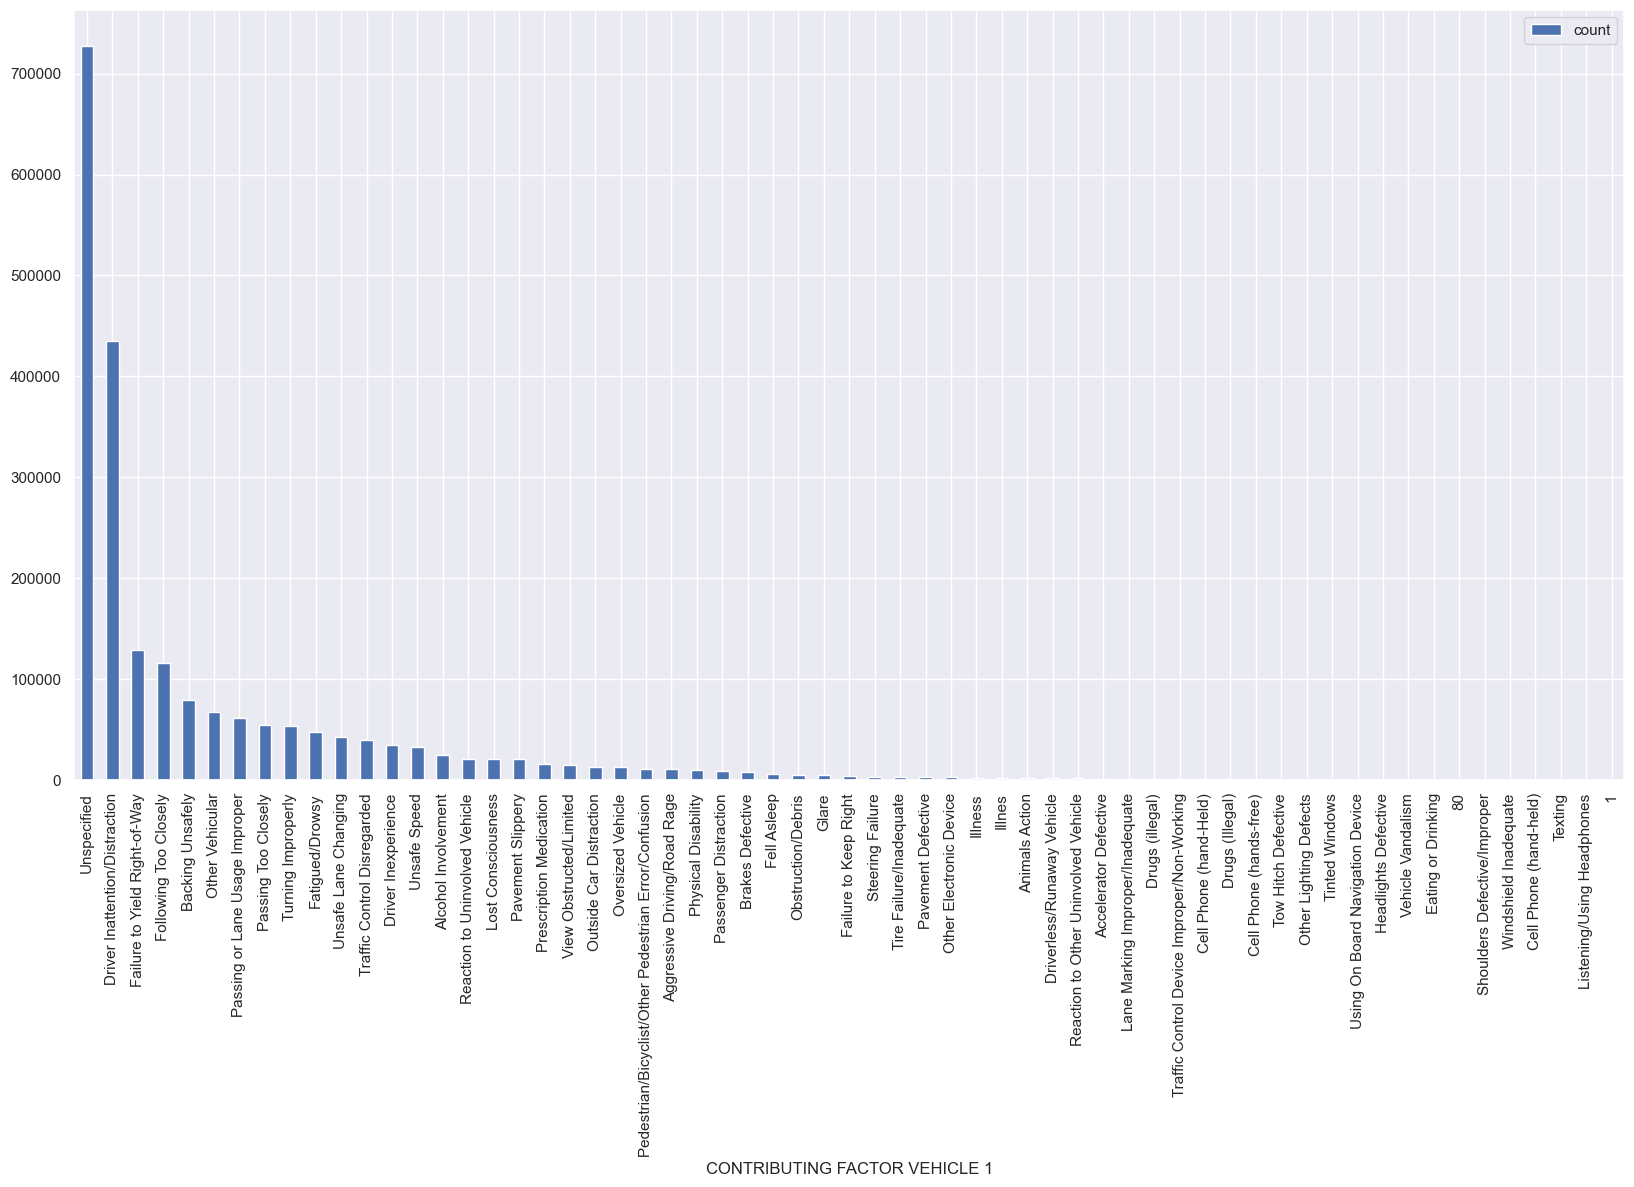

In [115]:
vehicle_1.plot(kind = 'bar', figsize=(20,10))

For contributing factor vehicle 1, we see the highest factor for the collision is inattention/distraction, followed by failure to yield the right of way, and finally following too closely.

Data cleaning needed: Looks like whoever made the dataset forgot to convert 80 and 1 into their string values. Additionally, we have mismatched string values like illness and Illnes, Drugs(illegal) and Drugs(Illegal). We'll need to fix these before continuing our analysis.

<Axes: xlabel='CONTRIBUTING FACTOR VEHICLE 2'>

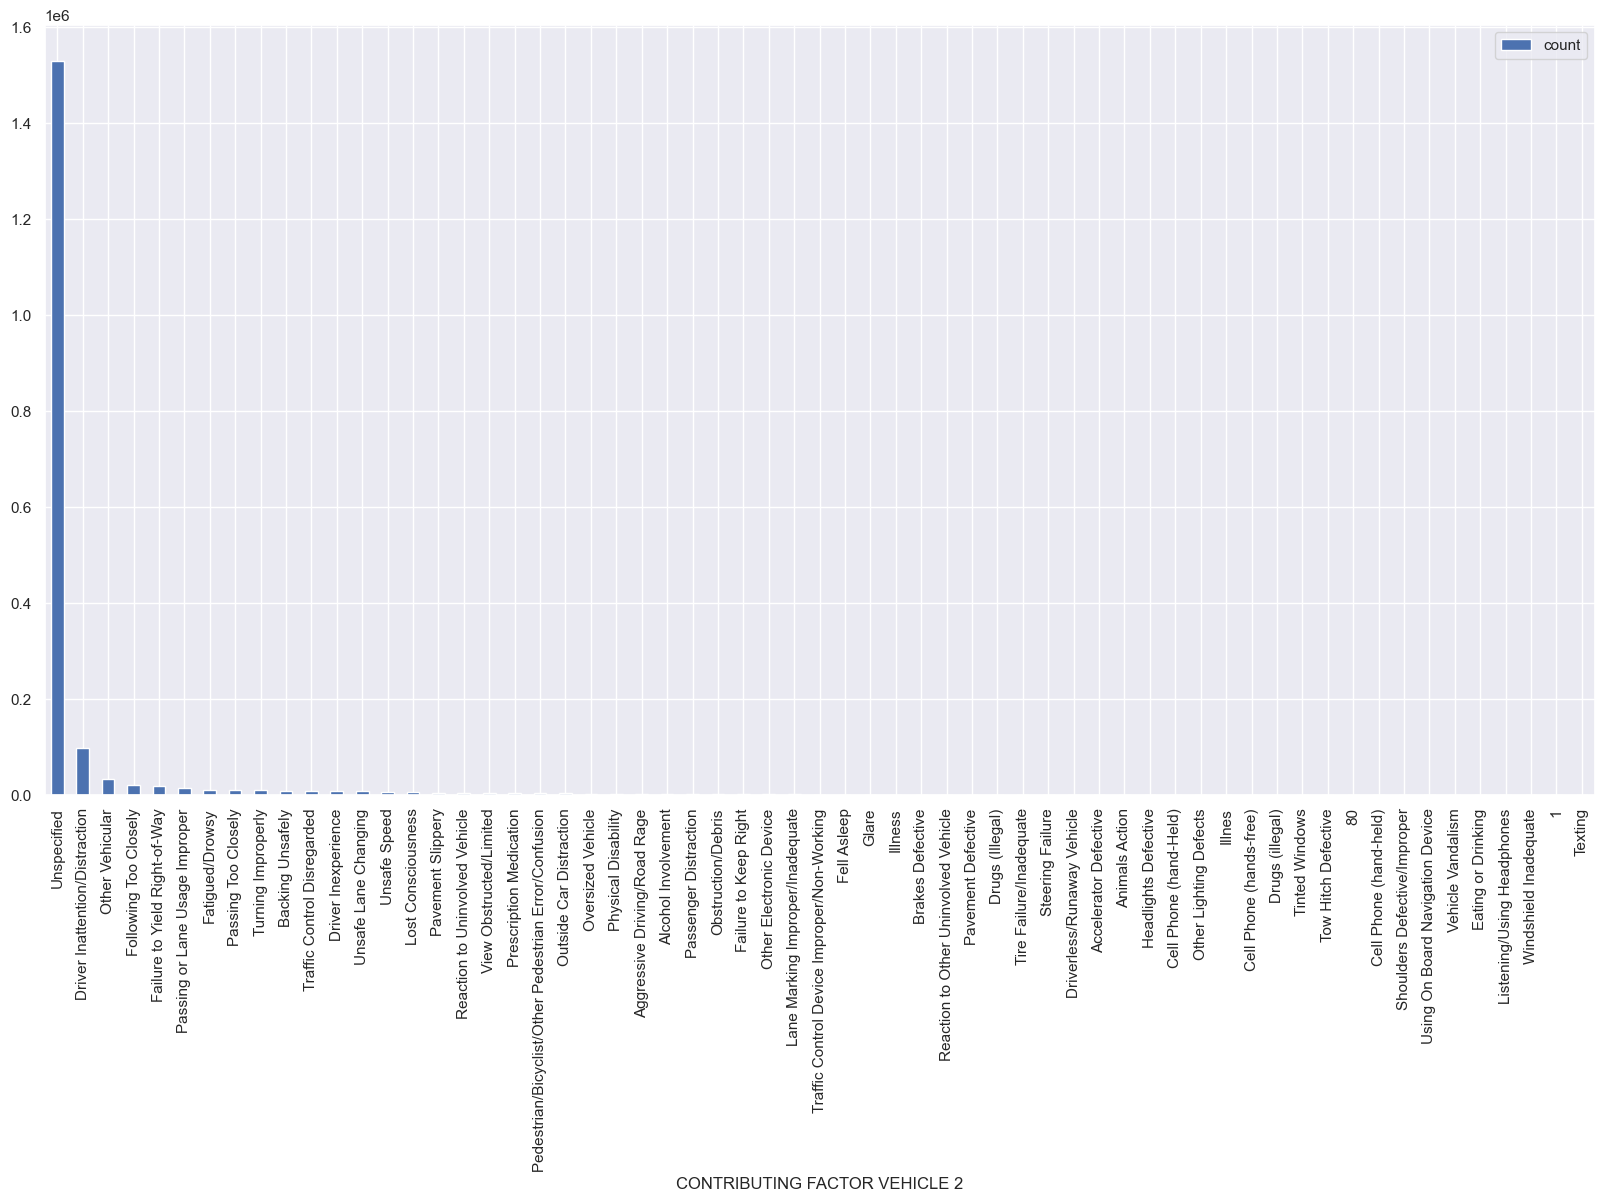

In [116]:
pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()).plot(kind = 'bar', figsize=(20,10))

We see similar trends for contributing factor vehicle 2, however, this time the second highest factor is other vehicular.

<Axes: xlabel='CONTRIBUTING FACTOR VEHICLE 3'>

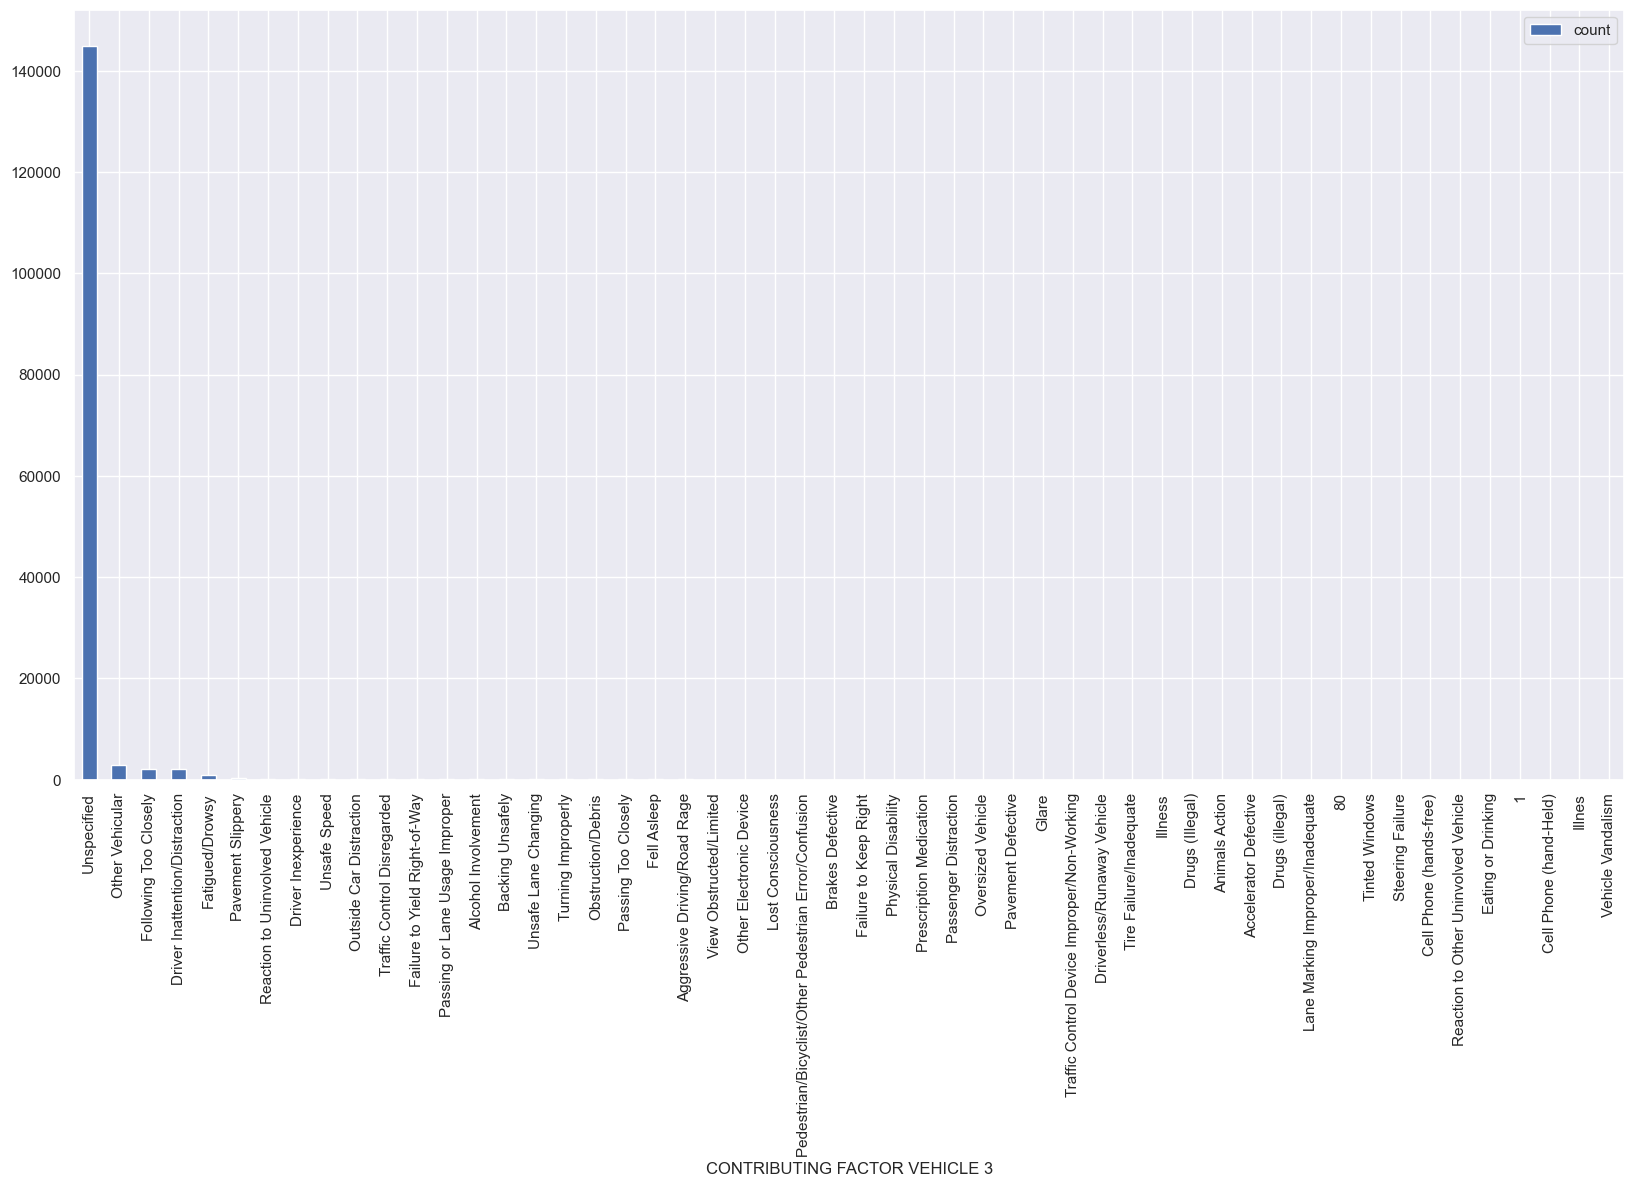

In [117]:
pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()).plot(kind = 'bar', figsize=(20,10))

In the datasets, many of the missing values in the contributing factor vehicle columns are due to the number of vehicles involved in the collisions. If only 2 or fewer vehicles were involved, the other vehicle fields were left blank, resulting in blanks in the dataset. 

I'll look at the different vehicle types next.

In [118]:
collisions_subsets['VEHICLE TYPE CODE 1'].unique()

array(['Sedan', 'Moped', 'Station Wagon/Sport Utility Vehicle', ...,
       'For', 'Toolcat', 'DOLLAR VAN'], dtype=object)

There are many unique string values, and several of them can be grouped together because they refer to the same type of vehicle. For example, SPORT UTILITY / STATION WAGON and Station Wagon/Sport Utility Vehicle. Additionally, the strings exhibit variations in casing.

Let's look at the numerical values next:

In [119]:
collisions_subsets.describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2.156339e+06,2.156326e+06,2.156357e+06,2.156357e+06,2.156357e+06,2.156357e+06,2.156357e+06,2.156357e+06,2.156357e+06
mean,3.204130e-01,1.550322e-03,5.840174e-02,7.684256e-04,2.796939e-02,1.210375e-04,2.297899e-01,6.325483e-04,3.219408e+06
std,7.086361e-01,4.153399e-02,2.477228e-01,2.827314e-02,1.670118e-01,1.104311e-02,6.698103e-01,2.750331e-02,1.507355e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.175209e+06
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.714448e+06
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.253765e+06
max,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.793167e+06


We see that the highest number of persons injured in the dataset is 43, with a mean of 3.2 injured. The highest number of persons killed due to a collision is 8. Cyclists have the lowest number of injuries and deaths out of all those in the dataset. 

## Data Cleaning

Let's drop the unspecified columns as these don't give us a clear picture for our analysis:

In [120]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'] == "Unspecified") | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'] == "Unspecified") | 
         (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'] == "Unspecified") | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'] == "Unspecified") | 
         (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'] == "Unspecified"))

collisions_subsets = collisions_subsets.drop(collisions_subsets.loc[mask].index)

collisions_subsets

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,03/26/2022,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
6,11/01/2023,7:12,HUTCHINSON RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/01/2023,8:01,WEST 35 STREET,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN
10,12/14/2021,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
19,12/14/2021,0:59,BELT PARKWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4486564,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156344,02/12/2025,16:17,3 AVE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4792654,Sedan,NaN,NaN,NaN,NaN
2156350,02/13/2025,11:20,NaN,1.0,0.0,0,0,0,0,1,...,Driver Inattention/Distraction,NaN,NaN,NaN,4792519,Sedan,Sedan,NaN,NaN,NaN
2156352,02/14/2025,10:05,E TREMONT AVE,1.0,0.0,0,0,0,0,1,...,Aggressive Driving/Road Rage,NaN,NaN,NaN,4792847,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2156354,02/14/2025,8:11,80 ST,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,4792666,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


Let's fill in the vehical collision factors that have NaN with not applicable, since some of these collisions didn't involve more than 1 or 2 vehicles:

In [121]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'].isna()) | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'].isna()) | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'].isna()) | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'].isna()) | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'].isna()))

collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('Not Applicable')

collisions_subsets.loc[mask]

C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_17016\3592208497.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.0 0.0 0.0 ... 1.0 1.0 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('Not Applicable')
C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_17016\3592208497.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0 0.0 0.0 ... 0.0 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('Not Applicable')


,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,03/26/2022,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4513547,Sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
6,11/01/2023,7:12,HUTCHINSON RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,Driver Inattention/Distraction,Not Applicable,Not Applicable,Not Applicable,4675709,Sedan,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable
7,11/01/2023,8:01,WEST 35 STREET,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4675769,Sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10,12/14/2021,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4486609,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
19,12/14/2021,0:59,BELT PARKWAY,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4486564,Sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156344,02/12/2025,16:17,3 AVE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4792654,Sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2156350,02/13/2025,11:20,Not Applicable,1.0,0.0,0,0,0,0,1,...,Driver Inattention/Distraction,Not Applicable,Not Applicable,Not Applicable,4792519,Sedan,Sedan,Not Applicable,Not Applicable,Not Applicable
2156352,02/14/2025,10:05,E TREMONT AVE,1.0,0.0,0,0,0,0,1,...,Aggressive Driving/Road Rage,Not Applicable,Not Applicable,Not Applicable,4792847,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable
2156354,02/14/2025,8:11,80 ST,1.0,0.0,1,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4792666,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [122]:
collisions_subsets.isna().sum()

CRASH DATE                         0
CRASH TIME                         0
ON STREET NAME                   140
NUMBER OF PERSONS INJURED          0
NUMBER OF PERSONS KILLED           0
NUMBER OF PEDESTRIANS INJURED      0
NUMBER OF PEDESTRIANS KILLED       0
NUMBER OF CYCLIST INJURED          0
NUMBER OF CYCLIST KILLED           0
NUMBER OF MOTORIST INJURED         0
NUMBER OF MOTORIST KILLED          0
CONTRIBUTING FACTOR VEHICLE 1      0
CONTRIBUTING FACTOR VEHICLE 2      0
CONTRIBUTING FACTOR VEHICLE 3      0
CONTRIBUTING FACTOR VEHICLE 4      0
CONTRIBUTING FACTOR VEHICLE 5      0
COLLISION_ID                       0
VEHICLE TYPE CODE 1                4
VEHICLE TYPE CODE 2                4
VEHICLE TYPE CODE 3                5
VEHICLE TYPE CODE 4                8
VEHICLE TYPE CODE 5               19
dtype: int64

Let's look at the missing street names:

In [123]:
#Let's look at the missing street names:

mask = collisions_subsets['ON STREET NAME'].isna()

collisions_subsets.loc[mask]

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3776,09/13/2021,5:35,NaN,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4456559,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,Station Wagon/Sport Utility Vehicle,Sedan
15766,12/21/2021,2:33,NaN,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4488457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Sedan
18292,09/23/2021,11:50,NaN,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4460528,Pick-up Truck,Sedan,Sedan,Sedan,Sedan
28765,05/30/2021,2:30,NaN,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Passing Too Closely,4422064,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
62985,01/17/2022,19:00,NaN,0.0,0.0,0,0,0,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Inattention/Distraction,4496530,Sedan,Sedan,Sedan,Sedan,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122857,08/17/2024,10:06,NaN,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4749427,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2126971,10/13/2024,3:04,NaN,0.0,0.0,0,0,0,0,0,...,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Other Vehicular,Other Vehicular,4763422,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2130673,10/10/2024,23:20,NaN,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4762685,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2132580,10/09/2024,21:01,NaN,1.0,0.0,0,0,0,0,1,...,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,4763608,Sedan,Sedan,Sedan,Sedan,Sedan


Looks like the police forgot to fill this information in. We'll keep the columns in our dataset as this is valuable information and simply replace these missing values as 'No Information Provided.'

In [124]:
collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('No Information Provided')

collisions_subsets.loc[mask]

C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_17016\4264407731.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('No Information Provided')


,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3776,09/13/2021,5:35,No Information Provided,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4456559,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,Station Wagon/Sport Utility Vehicle,Sedan
15766,12/21/2021,2:33,No Information Provided,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4488457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Sedan
18292,09/23/2021,11:50,No Information Provided,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4460528,Pick-up Truck,Sedan,Sedan,Sedan,Sedan
28765,05/30/2021,2:30,No Information Provided,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Passing Too Closely,4422064,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No Information Provided
62985,01/17/2022,19:00,No Information Provided,0.0,0.0,0,0,0,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Inattention/Distraction,4496530,Sedan,Sedan,Sedan,Sedan,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122857,08/17/2024,10:06,No Information Provided,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4749427,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2126971,10/13/2024,3:04,No Information Provided,0.0,0.0,0,0,0,0,0,...,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Other Vehicular,Other Vehicular,4763422,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2130673,10/10/2024,23:20,No Information Provided,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4762685,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2132580,10/09/2024,21:01,No Information Provided,1.0,0.0,0,0,0,0,1,...,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,Driverless/Runaway Vehicle,4763608,Sedan,Sedan,Sedan,Sedan,Sedan


In [125]:
collisions_subsets.isna().sum()

CRASH DATE                        0
CRASH TIME                        0
ON STREET NAME                    0
NUMBER OF PERSONS INJURED         0
NUMBER OF PERSONS KILLED          0
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
CONTRIBUTING FACTOR VEHICLE 3     0
CONTRIBUTING FACTOR VEHICLE 4     0
CONTRIBUTING FACTOR VEHICLE 5     0
COLLISION_ID                      0
VEHICLE TYPE CODE 1               2
VEHICLE TYPE CODE 2               2
VEHICLE TYPE CODE 3               3
VEHICLE TYPE CODE 4               6
VEHICLE TYPE CODE 5              15
dtype: int64

Let's look at the remaining missing values in the vehicle type codes:

In [126]:
mask = ((collisions_subsets['VEHICLE TYPE CODE 1'].isna()) | (collisions_subsets['VEHICLE TYPE CODE 2'].isna()) | 
        (collisions_subsets['VEHICLE TYPE CODE 3'].isna()) | (collisions_subsets['VEHICLE TYPE CODE 4'].isna()) | 
        (collisions_subsets['VEHICLE TYPE CODE 5'].isna()))

collisions_subsets.loc[mask]

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
78877,08/15/2021,22:30,BELT PARKWAY,1.0,0.0,0,0,0,0,1,...,Reaction to Uninvolved Vehicle,Reaction to Uninvolved Vehicle,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,4447326,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
181546,09/19/2022,7:55,LONG ISLAND EXPRESSWAY,2.0,0.0,0,0,0,0,2,...,Following Too Closely,Following Too Closely,Following Too Closely,Driver Inattention/Distraction,4565450,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
202485,05/14/2023,11:35,EAST 177 STREET,1.0,0.0,0,0,0,0,1,...,Driver Inattention/Distraction,Other Vehicular,Other Vehicular,Other Vehicular,4629192,Taxi,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
372630,10/23/2020,4:43,WEST 155 STREET,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Driver Inattention/Distraction,4385359,Sedan,Sedan,Sedan,Sedan,NaN
418749,05/27/2020,17:41,VANWYCK EXPRESSWAY,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4316517,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN
420657,06/22/2020,22:05,FDR DRIVE,0.0,0.0,0,0,0,0,0,...,Outside Car Distraction,Outside Car Distraction,Outside Car Distraction,Following Too Closely,4322789,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN
444402,03/10/2020,7:30,BRUCKNER EXPRESSWAY,1.0,0.0,0,0,0,0,1,...,Following Too Closely,Following Too Closely,Following Too Closely,Following Too Closely,4306974,Pick-up Truck,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
605423,05/07/2019,2:00,MAJOR DEEGAN EXPRESSWAY,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4127114,Sedan,Taxi,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
754889,09/20/2018,16:00,BRONX RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,Lane Marking Improper/Inadequate,Lane Marking Improper/Inadequate,Obstruction/Debris,Obstruction/Debris,3986444,Pick-up Truck,Sedan,Sedan,Sedan,NaN
829875,05/29/2018,17:00,EAST TREMONT AVENUE,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Following Too Closely,3910913,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN


Similar to the street names, these weren't filled in by the police officer, we'll replace these with no information provided as well.

In [127]:
collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('No Information Provided')

collisions_subsets.loc[mask]

C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_17016\4264407731.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  collisions_subsets.loc[mask] = collisions_subsets.loc[mask].fillna('No Information Provided')


,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
78877,08/15/2021,22:30,BELT PARKWAY,1.0,0.0,0,0,0,0,1,...,Reaction to Uninvolved Vehicle,Reaction to Uninvolved Vehicle,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,4447326,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,No Information Provided,No Information Provided
181546,09/19/2022,7:55,LONG ISLAND EXPRESSWAY,2.0,0.0,0,0,0,0,2,...,Following Too Closely,Following Too Closely,Following Too Closely,Driver Inattention/Distraction,4565450,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No Information Provided,No Information Provided,No Information Provided
202485,05/14/2023,11:35,EAST 177 STREET,1.0,0.0,0,0,0,0,1,...,Driver Inattention/Distraction,Other Vehicular,Other Vehicular,Other Vehicular,4629192,Taxi,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No Information Provided,No Information Provided
372630,10/23/2020,4:43,WEST 155 STREET,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Driver Inattention/Distraction,4385359,Sedan,Sedan,Sedan,Sedan,No Information Provided
418749,05/27/2020,17:41,VANWYCK EXPRESSWAY,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4316517,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,No Information Provided
420657,06/22/2020,22:05,FDR DRIVE,0.0,0.0,0,0,0,0,0,...,Outside Car Distraction,Outside Car Distraction,Outside Car Distraction,Following Too Closely,4322789,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,No Information Provided
444402,03/10/2020,7:30,BRUCKNER EXPRESSWAY,1.0,0.0,0,0,0,0,1,...,Following Too Closely,Following Too Closely,Following Too Closely,Following Too Closely,4306974,Pick-up Truck,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No Information Provided
605423,05/07/2019,2:00,MAJOR DEEGAN EXPRESSWAY,0.0,0.0,0,0,0,0,0,...,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,4127114,Sedan,Taxi,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No Information Provided
754889,09/20/2018,16:00,BRONX RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,Lane Marking Improper/Inadequate,Lane Marking Improper/Inadequate,Obstruction/Debris,Obstruction/Debris,3986444,Pick-up Truck,Sedan,Sedan,Sedan,No Information Provided
829875,05/29/2018,17:00,EAST TREMONT AVENUE,1.0,0.0,0,0,0,0,1,...,Other Vehicular,Other Vehicular,Other Vehicular,Following Too Closely,3910913,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,No Information Provided


Let's look at the 80 categories we saw in the EDA section. Looking at the police report code for vehicle collisions in New York, 80 refers to 'Other Environmental' as the cause of the collision [1]. Let's fix these values.

In [128]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'] == '80') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'] == '80') | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'] == '80') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'] == '80') | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'] == '80'))

collisions_subsets.loc[mask] = collisions_subsets.loc[mask].replace('80', 'Environmental Factors')

collisions_subsets.loc[mask]

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1156731,03/29/2016,16:14,127 AVENUE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3428332,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1283561,03/25/2016,7:00,Not Applicable,1.0,0.0,0,0,0,0,1,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3414808,Box Truck,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1299879,04/14/2016,14:00,Not Applicable,0.0,0.0,0,0,0,0,0,...,Environmental Factors,Not Applicable,Not Applicable,Not Applicable,3430224,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable
1305774,04/18/2016,7:45,NEREID AVENUE,0.0,0.0,0,0,0,0,0,...,Environmental Factors,Not Applicable,Not Applicable,Not Applicable,3413446,4 dr sedan,Stake or Rack,Not Applicable,Not Applicable,Not Applicable
1306741,04/21/2016,16:25,CROTONA AVENUE,0.0,0.0,0,0,0,0,0,...,Environmental Factors,Not Applicable,Not Applicable,Not Applicable,3413800,Station Wagon/Sport Utility Vehicle,Sedan,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331708,03/18/2016,11:56,WEBSTER AVENUE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3413587,4 dr sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1331726,04/02/2016,17:00,Not Applicable,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3414883,4 dr sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1331932,04/03/2016,9:00,PENELOPE AVENUE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3423319,2 dr sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1332093,03/27/2016,20:55,Not Applicable,1.0,0.0,0,0,0,0,1,...,Environmental Factors,Not Applicable,Not Applicable,Not Applicable,3420493,4 dr sedan,4 dr sedan,Not Applicable,Not Applicable,Not Applicable


In [129]:
collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Pavement Slippery', 'Following Too Closely',
       'Failure to Yield Right-of-Way', 'Not Applicable', 'Unsafe Speed',
       'Steering Failure', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Accelerator Defective',
       'Traffic Control Disregarded',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Aggressive Driving/Road Rage', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Passing Too Closely', 'Illnes',
       'Reaction to Uninvolved Vehicle', 'Backing Unsafely',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Obstruction/Debris', 'Tinted Windows', 'Unsafe Lane Changing',
       'Turning Improperly', 'Pavement Defective', 'Fell Asleep',
       'Animals Action', 'Outside Car Distraction',
       'Driverless/Runaway Vehicle', 'Brakes Defective',
       'Lost Consciousness', 'Tire Failure/Inadequate',
       'Headlights Defective', 'Passenger Distraction', 'Glare',
       'Oversized Vehicle', 'Drugs (il

In [130]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'] == '1') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'] == '1') | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'] == '1') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'] == '1') |
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'] == '1'))

collisions_subsets.loc[mask]

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1307124,04/14/2016,9:45,BEDFORD AVENUE,0.0,0.0,0,0,0,0,0,...,Driver Inexperience,Not Applicable,Not Applicable,Not Applicable,3414991,4 dr sedan,4 dr sedan,Not Applicable,Not Applicable,Not Applicable
1312137,04/16/2016,3:20,FULTON STREET,1.0,0.0,0,0,0,0,1,...,1,Not Applicable,Not Applicable,Not Applicable,3419058,Taxi,4 dr sedan,Not Applicable,Not Applicable,Not Applicable
1318041,03/16/2016,17:08,Not Applicable,2.0,0.0,0,0,0,0,2,...,1,1,Not Applicable,Not Applicable,3419694,2 dr sedan,4 dr sedan,4 dr sedan,Not Applicable,Not Applicable
1318125,04/07/2016,16:25,EAST NEW YORK AVENUE,0.0,0.0,0,0,0,0,0,...,1,Not Applicable,Not Applicable,Not Applicable,3418949,4 dr sedan,4 dr sedan,Not Applicable,Not Applicable,Not Applicable
1320790,03/17/2016,17:45,Not Applicable,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3430839,4 dr sedan,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1322736,03/31/2016,16:05,Not Applicable,0.0,0.0,0,0,0,0,0,...,Unsafe Speed,Not Applicable,Not Applicable,Not Applicable,3410763,4 dr sedan,4 dr sedan,Not Applicable,Not Applicable,Not Applicable
1323983,03/24/2016,11:00,Not Applicable,0.0,0.0,0,0,0,0,0,...,Brakes Defective,Not Applicable,Not Applicable,Not Applicable,3405668,Box Truck,4 dr sedan,Not Applicable,Not Applicable,Not Applicable
1326012,03/24/2016,3:15,Interborough Pkwy,0.0,0.0,0,0,0,0,0,...,1,Not Applicable,Not Applicable,Not Applicable,3422250,4 dr sedan,Stake or Rack,Not Applicable,Not Applicable,Not Applicable
1326718,03/23/2016,14:30,Not Applicable,0.0,0.0,0,0,0,0,0,...,1,Not Applicable,Not Applicable,Not Applicable,3430878,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Not Applicable,Not Applicable,Not Applicable
1332901,03/16/2016,17:32,MARCY AVENUE,1.0,0.0,0,0,1,0,0,...,Passing or Lane Usage Improper,Not Applicable,Not Applicable,Not Applicable,3419995,4 dr sedan,Bike,Not Applicable,Not Applicable,Not Applicable


The referenced document above mentioned nothing about what code 1 could refer to. Since only 10 records include this code, we'll drop them from the dataset. 

In [131]:
collisions_subsets = collisions_subsets.drop(collisions_subsets.loc[mask].index)

We'll fix the mismatched string values in the dataset that we saw in the EDA section. 

In [132]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'] == 'Drugs (Illegal)') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'] == 'Drugs (Illegal)') | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'] == 'Drugs (Illegal)') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'] == 'Drugs (Illegal)') |
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'] == 'Drugs (Illegal)'))

collisions_subsets.loc[mask] = collisions_subsets.loc[mask].replace('Drugs (Illegal)', 'Drugs (illegal)')

collisions_subsets.loc[mask]

,CRASH DATE,CRASH TIME,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1333578,03/03/2016,23:15,WEST END AVENUE,0.0,0.0,0,0,0,0,0,...,Driver Inattention/Distraction,Not Applicable,Not Applicable,Not Applicable,3399275,SPORT UTILITY / STATION WAGON,TAXI,Not Applicable,Not Applicable,Not Applicable
1333764,02/27/2016,3:30,65 STREET,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3396076,SPORT UTILITY / STATION WAGON,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1336755,02/20/2016,8:15,VANDERBILT AVENUE,0.0,0.0,0,0,0,0,0,...,Drugs (illegal),Not Applicable,Not Applicable,Not Applicable,3392089,PASSENGER VEHICLE,UNKNOWN,Not Applicable,Not Applicable,Not Applicable
1341263,03/03/2016,20:40,EAST TREMONT AVENUE,0.0,0.0,0,0,0,0,0,...,Drugs (illegal),Other Vehicular,Other Vehicular,Not Applicable,3399381,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Not Applicable
1341743,03/06/2016,15:50,Not Applicable,0.0,0.0,0,0,0,0,0,...,Drugs (illegal),Not Applicable,Not Applicable,Not Applicable,3401228,LIVERY VEHICLE,PASSENGER VEHICLE,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083137,08/12/2012,17:15,RIVER TERRACE,0.0,0.0,0,0,0,0,0,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,425,PASSENGER VEHICLE,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2084255,07/17/2012,7:30,Not Applicable,2.0,0.0,0,0,0,0,2,...,Other Vehicular,Not Applicable,Not Applicable,Not Applicable,3078769,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,Not Applicable,Not Applicable,Not Applicable
2088902,07/27/2012,16:19,Not Applicable,1.0,0.0,0,0,1,0,0,...,Drugs (illegal),Not Applicable,Not Applicable,Not Applicable,3078815,PASSENGER VEHICLE,BICYCLE,Not Applicable,Not Applicable,Not Applicable
2098635,07/16/2012,21:07,PARK CIRCLE,0.0,0.0,0,0,0,0,0,...,Drugs (illegal),Not Applicable,Not Applicable,Not Applicable,155910,PASSENGER VEHICLE,PASSENGER VEHICLE,Not Applicable,Not Applicable,Not Applicable


In [133]:
mask = ((collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'] == 'Illnes') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'] == 'Illnes') | 
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'] == 'Illnes') | (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'] == 'Illnes') |
        (collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'] == 'Illnes'))

collisions_subsets.loc[mask] = collisions_subsets.loc[mask].replace('Illnes', 'Illness')

Next, I'll clean the messy strings in the 'VEHICLE TYPE CODE' columns. I'll focus on counts above 500 and combine those under 500 as 'unknown.' This strategy will make it easier to clean the data as there will be less cleaning, and we won't lose information. 

In [154]:
collisions_subsets['VEHICLE TYPE CODE 1'] = collisions_subsets['VEHICLE TYPE CODE 1'].str.lower().str.strip()
collisions_subsets['VEHICLE TYPE CODE 2'] = collisions_subsets['VEHICLE TYPE CODE 2'].str.lower().str.strip()
collisions_subsets['VEHICLE TYPE CODE 3'] = collisions_subsets['VEHICLE TYPE CODE 3'].str.lower().str.strip()
collisions_subsets['VEHICLE TYPE CODE 4'] = collisions_subsets['VEHICLE TYPE CODE 4'].str.lower().str.strip()
collisions_subsets['VEHICLE TYPE CODE 5'] = collisions_subsets['VEHICLE TYPE CODE 5'].str.lower().str.strip()

In [ ]:
vehicles_1 = pd.DataFrame(collisions_subsets['VEHICLE TYPE CODE 1'].value_counts())
vehicles_2 = pd.DataFrame(collisions_subsets['VEHICLE TYPE CODE 2'].value_counts())
vehicles_3 = pd.DataFrame(collisions_subsets['VEHICLE TYPE CODE 3'].value_counts())
vehicles_4 = pd.DataFrame(collisions_subsets['VEHICLE TYPE CODE 4'].value_counts())
vehicles_5 = pd.DataFrame(collisions_subsets['VEHICLE TYPE CODE 5'].value_counts())

#Sum across all vehicle columns:
vehicles_count = pd.concat([vehicles_1, vehicles_2, vehicles_3, vehicles_4, vehicles_5], axis = 1).sum(axis = 1).to_frame(name = 'Total Count')

#Identify low-count vehicle types:
low_mask = vehicles_count['Total Count'] < 500
other_vehicles_sum = vehicles_count.loc[low_mask, 'Total Count'].sum()

vehicles_count = vehicles_count.reset_index()
vehicles_count.rename(columns={'index': 'Vehicle Type'}, inplace = True)

#Adding sum of other_vehicles to unknown:

mask = vehicles_count['Vehicle Type'] == 'unknown'

if mask.any():
    vehicles_count.loc[mask, 'Total Count'] += other_vehicles_sum
else:
    vehicles_count = pd.concat([vehicles_count, pd.DataFrame([{'Vehicle Type': ['unknown'], 'Total Count': [other_vehicles_sum]}])], ignore_index = True)

low_mask = vehicles_count['Total Count'] < 500

vehicles_count = vehicles_count[~low_mask]

replacement_dict = {
    "sedan": "sedan",
    "4 dr sedan": "sedan",
    "2 dr sedan": "sedan",
    
    "station wagon/sport utility vehicle": "suv",
    "sport utility / station wagon": "suv",
    
    "tractor truck diesel": "truck",
    "tractor truck gasoline": "truck",
    "large com veh(6 or more tires)": "truck",
    
    "motorcycle": "motorcycle",
    
    "dump": "garbage truck",
    "garbage or refuse": "garbage truck",
    
    "taxi": "taxi",
    "livery vehicle": "taxi",
    
    "other": "unknown",
    
    "van": "van",
    "small com veh(4 tires)": "van",
    
    "pk": "pick-up truck",
    
    "carry all": "cart"
}

vehicles_count['Vehicle Type'] = vehicles_count['Vehicle Type'].map(replacement_dict).fillna(vehicles_count['Vehicle Type'])

vehicles_count = vehicles_count.groupby('Vehicle Type', as_index = False)['Total Count'].sum()

#dropping not applicable:
vehicles_count = vehicles_count.drop(14, axis = 0)

vehicles_count

,Vehicle Type,Total Count
0,ambulance,1688.0
1,bicycle,3040.0
2,bike,14587.0
3,box truck,11530.0
4,bus,13635.0
5,cart,806.0
6,convertible,1198.0
7,e-bike,3167.0
8,e-scooter,2186.0
9,flat bed,1137.0


After creating the initial visualization for the various street names, I noticed that there were numerous white spaces present in the different street names. Therefore, we need to address this issue before proceeding with the visualization.

In [155]:
collisions_subsets['ON STREET NAME'] = collisions_subsets['ON STREET NAME'].apply(lambda x: x.strip() if isinstance(x, str) else x)

## Visualizations:

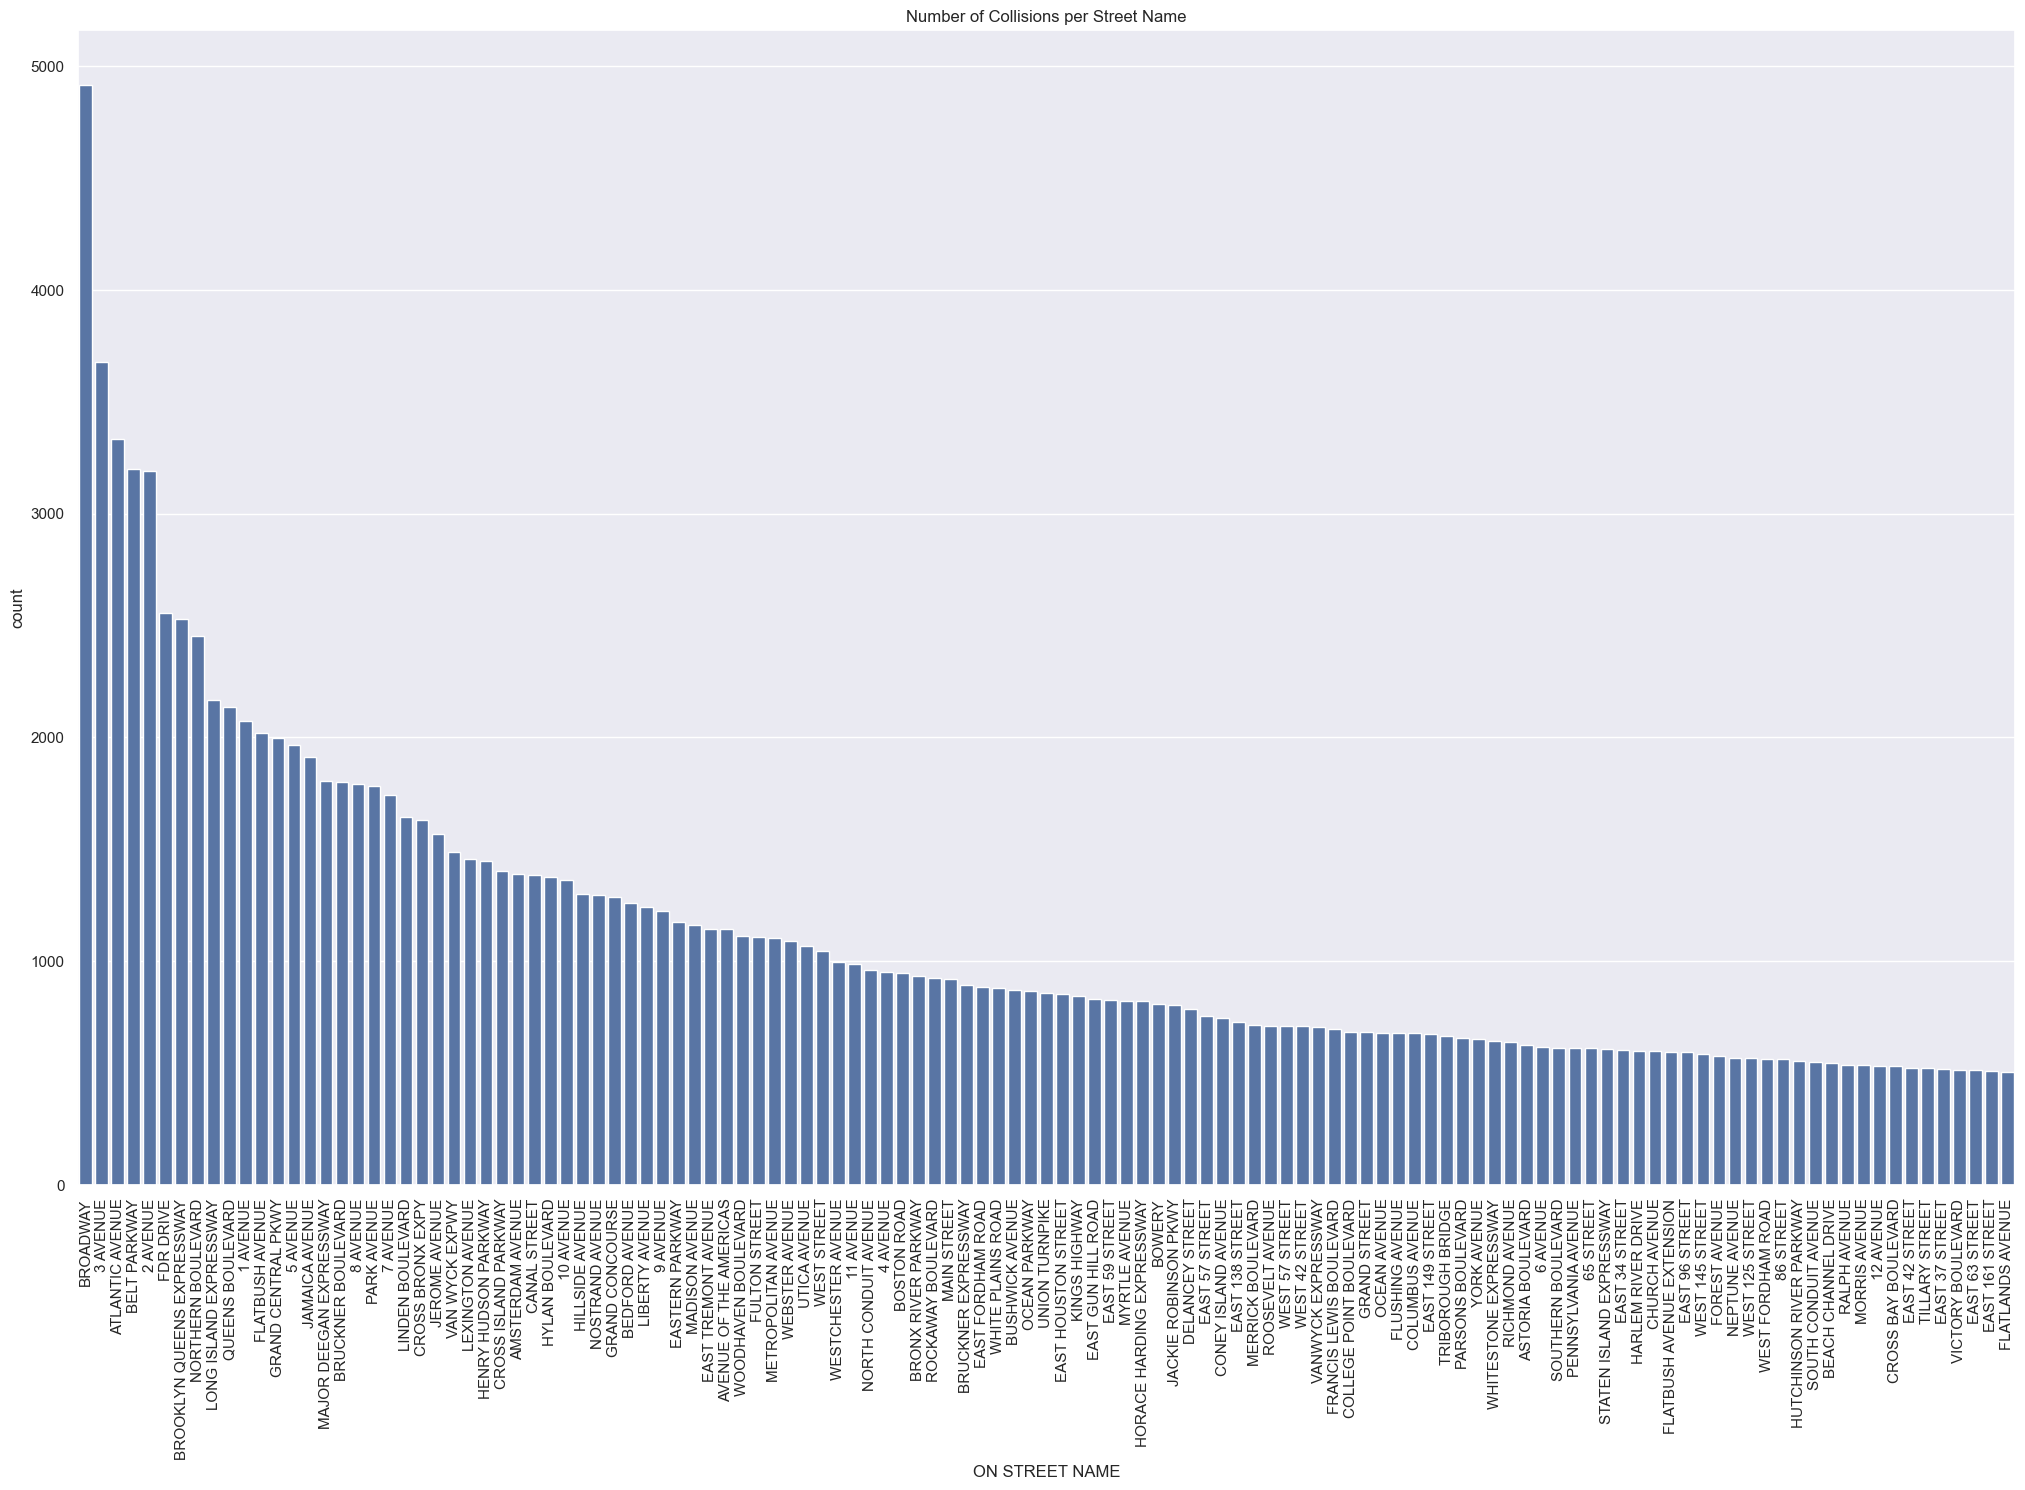

In [156]:
#Let's only look at the streets with 500 of more collisions:

streets = pd.DataFrame(collisions_subsets['ON STREET NAME'].value_counts())

streets = streets.drop('Not Applicable')

filtered_streets = streets[streets['count'] > 500]

plt.figure(figsize=(25,15))

sns.barplot(data = filtered_streets, x = filtered_streets.index, y = 'count')

plt.title('Number of Collisions per Street Name')

plt.xticks(rotation = 90)

plt.show()

Let's look at the cause for vehicle accidents:

In [157]:
vehicle_1 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 1'].value_counts())

vehicle_1 = vehicle_1.drop('Not Applicable')

vehicle_2 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 2'].value_counts())

vehicle_2 = vehicle_2.drop('Not Applicable')

vehicle_3 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 3'].value_counts())

vehicle_3 = vehicle_3.drop('Not Applicable')

vehicle_4 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 4'].value_counts())

vehicle_4 = vehicle_4.drop('Not Applicable')

vehicle_5 = pd.DataFrame(collisions_subsets['CONTRIBUTING FACTOR VEHICLE 5'].value_counts())

vehicle_5 = vehicle_5.drop('Not Applicable')

In [158]:
vehicle = pd.concat([vehicle_1, vehicle_2, vehicle_3, vehicle_4, vehicle_5], axis = 1, ignore_index=True)

vehicle = vehicle.rename(columns= {0:'Vehicle 1', 1:'Vehicle 2', 2:'Vehicle 3', 3:'Vehicle 4', 4:'Vehicle 5'})

vehicle = vehicle.fillna(0)

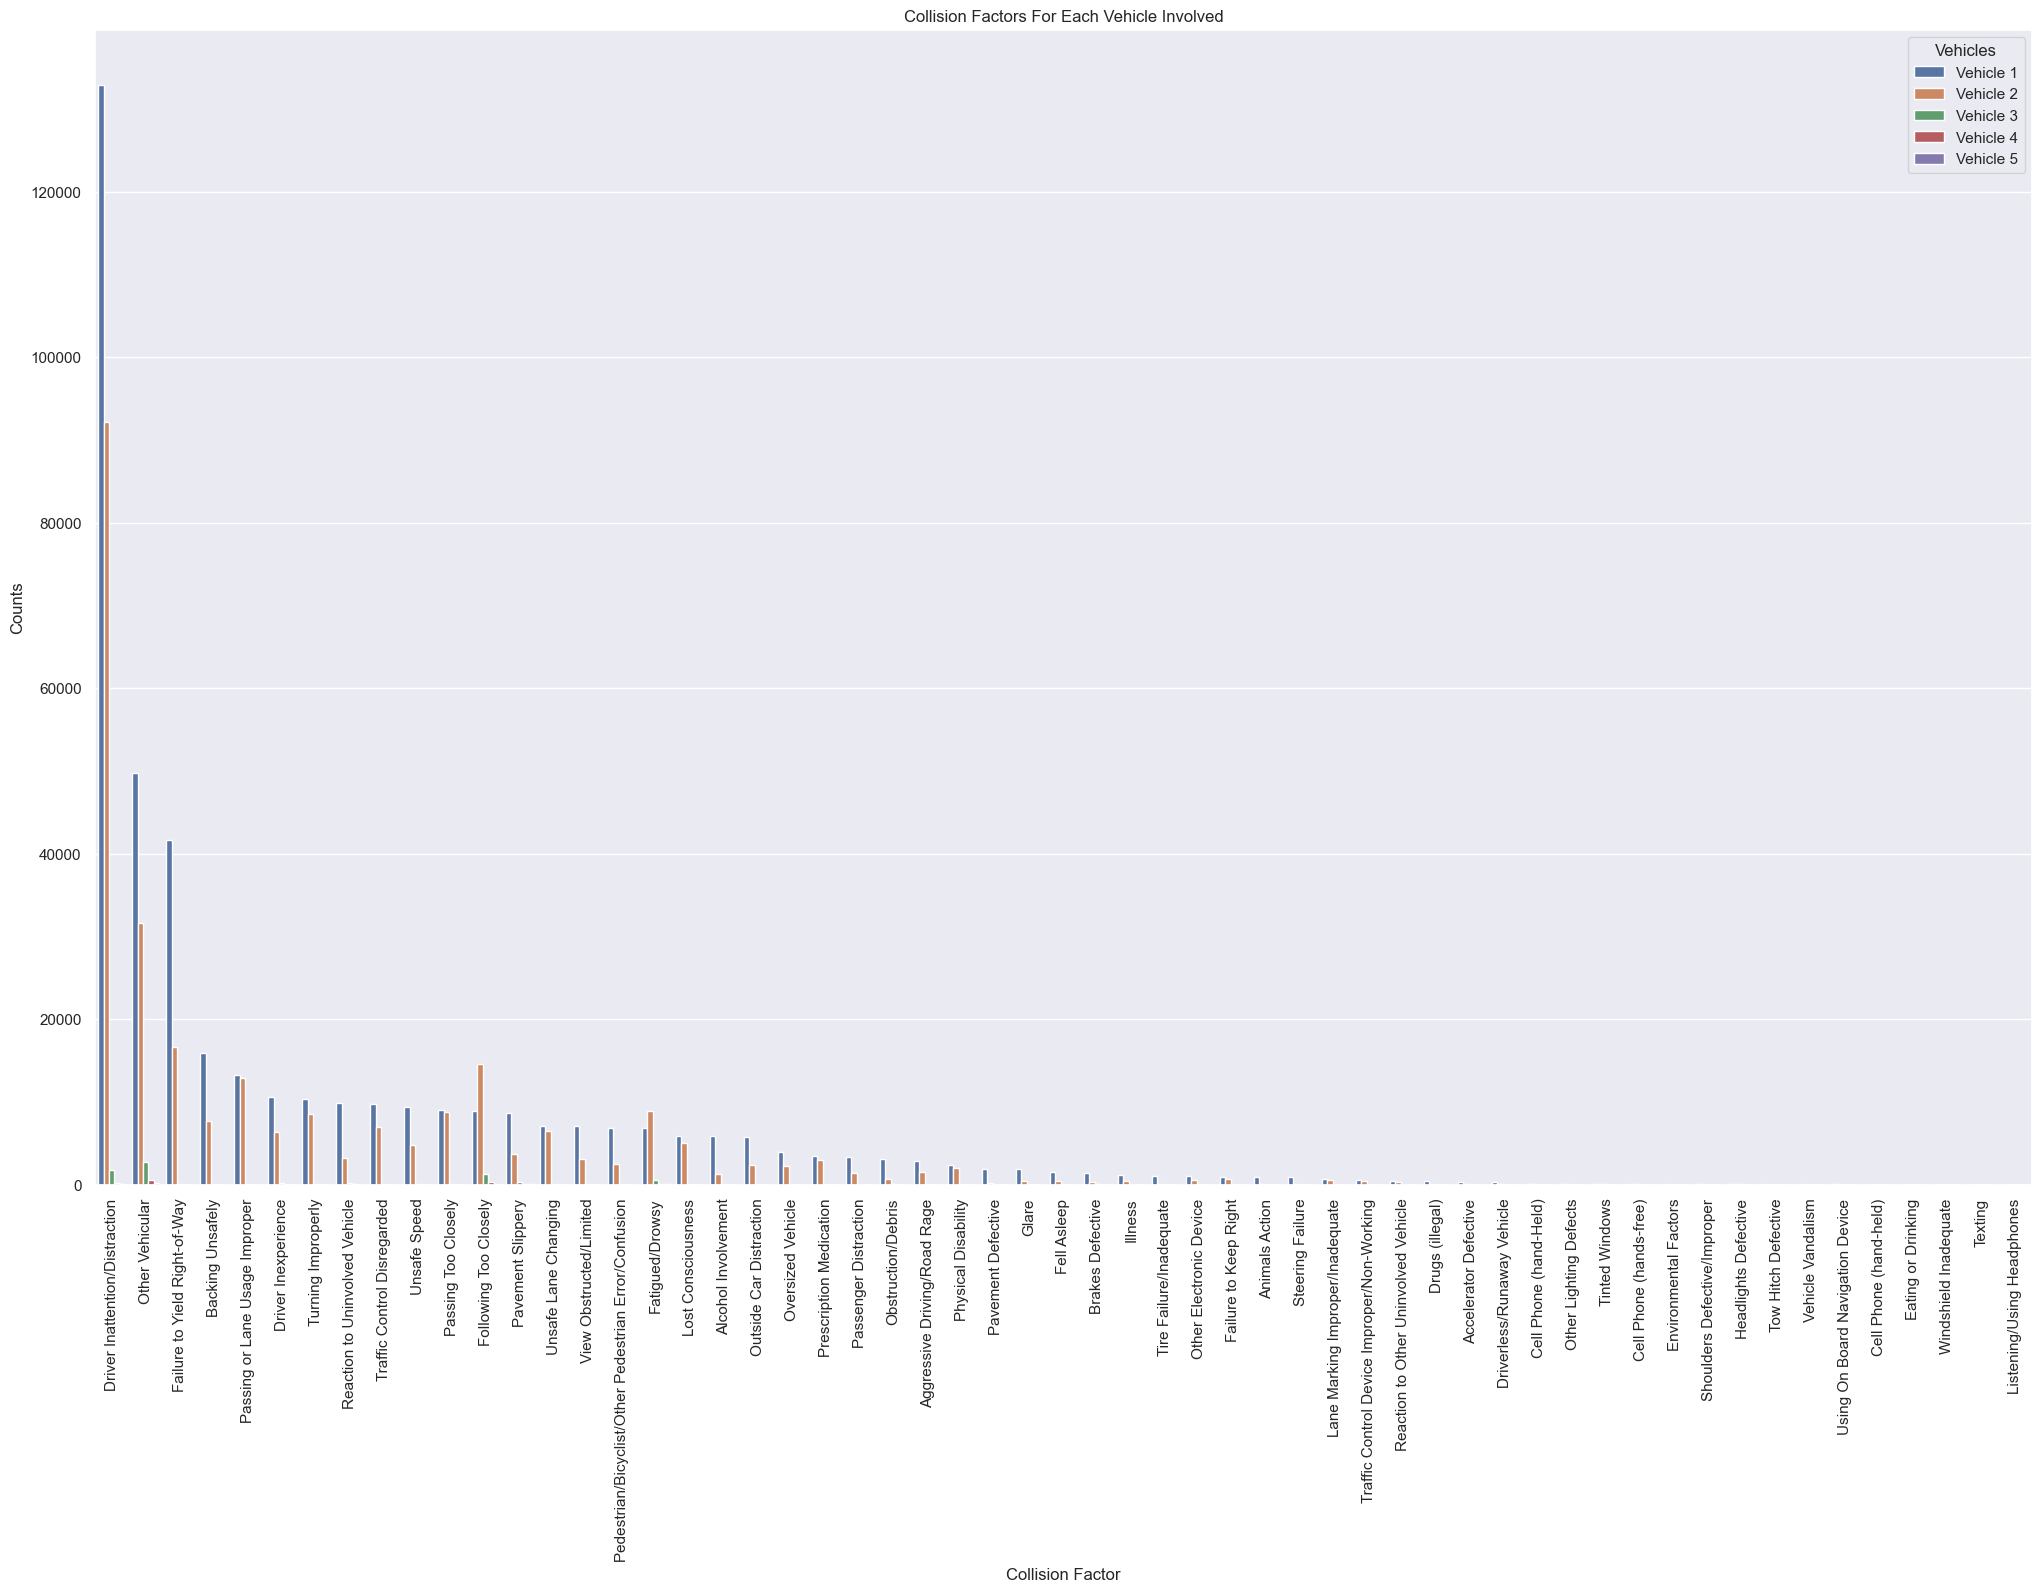

In [159]:
vehicle_melt = vehicle.reset_index().melt(id_vars = 'index', var_name = 'Vehicles', value_name = 'Factors')

plt.figure(figsize=(25,15))

sns.barplot(data = vehicle_melt, x = 'index', y = 'Factors', hue = 'Vehicles')

plt.title('Collision Factors For Each Vehicle Involved')
plt.xlabel('Collision Factor')
plt.ylabel('Counts')

plt.xticks(rotation = 90)

plt.show()

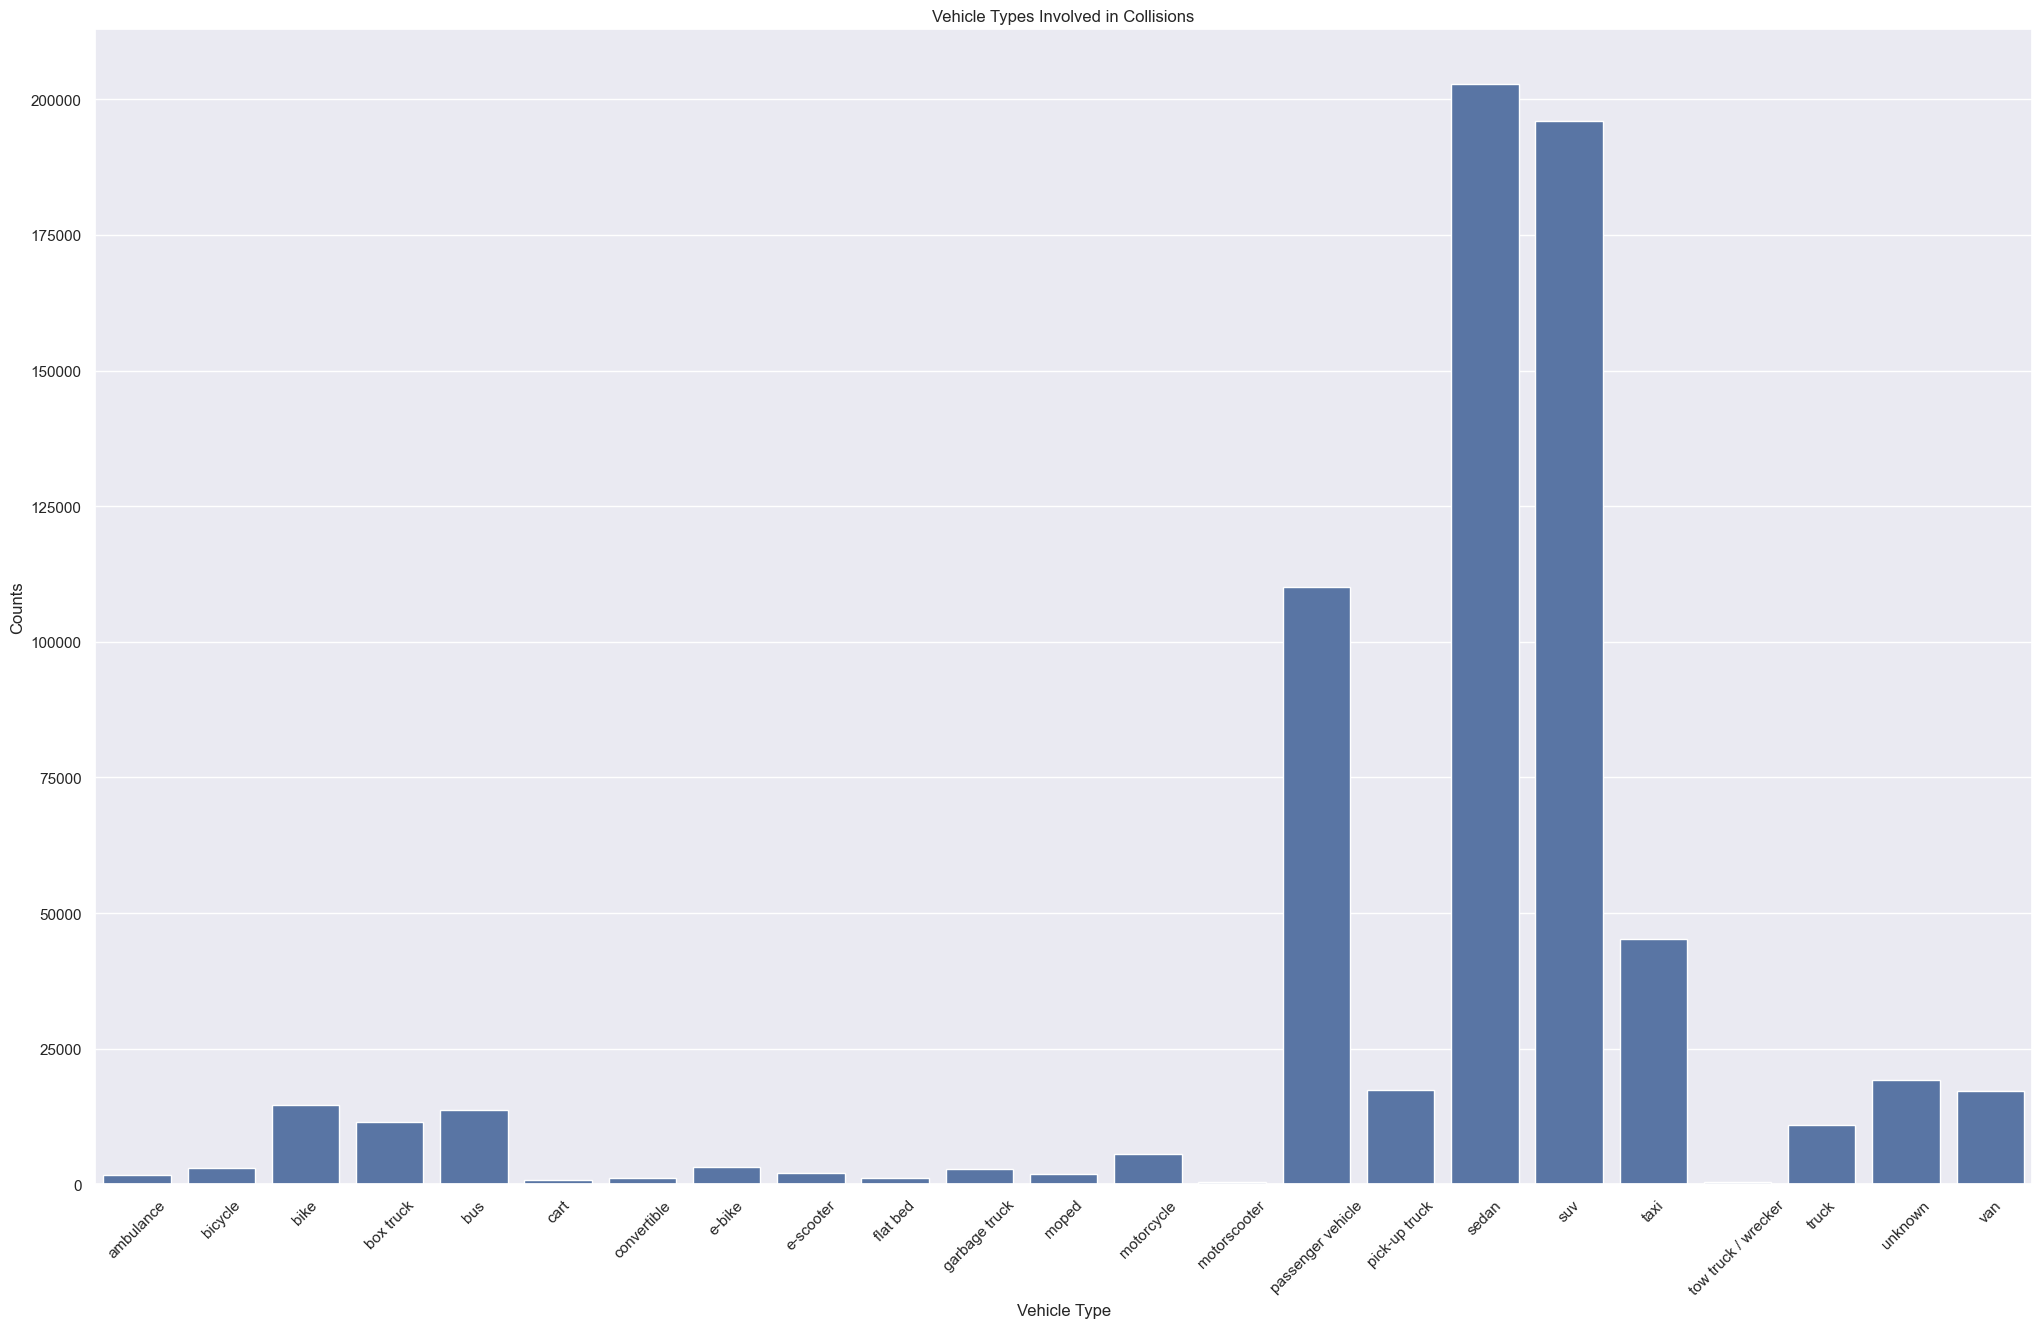

In [168]:
plt.figure(figsize=(25,15))

sns.barplot(data = vehicles_count, x = 'Vehicle Type', y = 'Total Count')

plt.title('Vehicle Types Involved in Collisions')
plt.xlabel('Vehicle Type')
plt.ylabel('Counts')

plt.xticks(rotation = 45)

plt.show()

## Analysis:

The majority of collisions that have been reported in New York City, which resulted in someone getting injured or killed or damages worth USD 1000, have occurred on Broadway, 3rd Avenue, and Atlantic Avenue. Looking at the top 4 causes of collisions, we can see that the top reason for accidents is distracted driving, other vehicles, failure to yield the right of way, and backing unsafely. The majority of vehicles involved in the accidents were sedans at 202,718 collisions, SUVs at 195,943 collisions, and passenger vehicles at 110,080 collisions. 

When analyzing the number of collisions by year, it is evident that the majority occurred between 2017 and 2018, during which we also recorded the highest number of injuries. However, collisions have been declining in recent years, potentially due to the rise of hybrid work arrangements resulting in fewer people on the road. The majority of crashes tend to occur between 4:00 and 5:00 PM, which coincides with peak traffic time as many individuals are leaving work and heading home. Unsurprisingly, the fewest collisions happen early in the morning, particularly between 2:00 and 5:00 AM. 

**(Please note that the visualizations mentioned above are available in the interactive Tableau dashboard.)**

Upon examining the streets with the highest number of collisions, it's evident that most of them are located in highly congested areas with narrow roads, particularly when parked cars line the sides. Therefore, the city should invest in better road planning and implement clearer road markings. Additionally, distracted driving is a major cause of these accidents, so the city should focus on community engagement initiatives such as social media campaigns, workshops, or programs in schools, aimed at reducing this behaviour. It’s also essential for police enforcement to play a role in ensuring that roads are safe and that drivers are adhering to traffic regulations.

## References:

[1] ACTAR.org. Actar.org. https://actar.org/resources/reports (accessed 2025-02-21).
‌
<br>

Dataset: Motor Vehicle Collisions - Crashes | NYC Open Data. data.cityofnewyork.us. https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data.
‌